In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3.8163262044637096


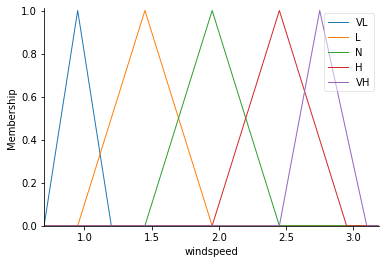

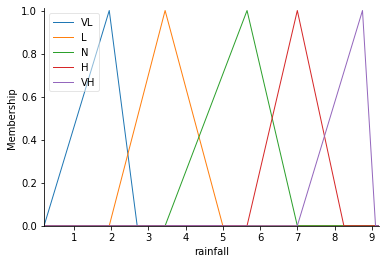

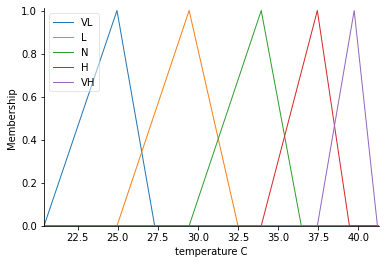

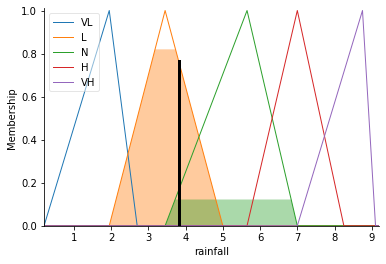

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

windspeed = ctrl.Antecedent(np.arange(0.7,3.2,0.01),'windspeed')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.01),'rainfall')
temp_C = ctrl.Antecedent(np.arange(20.4,41.3,0.01),'temperature C')


windspeed['VL'] = fuzz.trimf(windspeed.universe,[0.7,0.95,1.2])
windspeed['L'] = fuzz.trimf(windspeed.universe,[0.95,1.45,1.95])
windspeed['N'] = fuzz.trimf(windspeed.universe,[1.45,1.95,2.45])
windspeed['H'] = fuzz.trimf(windspeed.universe,[1.95,2.45,2.95])
windspeed['VH'] = fuzz.trimf(windspeed.universe,[2.45,2.75,3.1])

rainfall['VL'] = fuzz.trimf(rainfall.universe,[0.2,1.95,2.7])
rainfall['L'] = fuzz.trimf(rainfall.universe,[1.95,3.45,5])
rainfall['N'] = fuzz.trimf(rainfall.universe,[3.45,5.65,7])
rainfall['H'] = fuzz.trimf(rainfall.universe,[5.65,7,8.25])
rainfall['VH'] = fuzz.trimf(rainfall.universe,[7,8.75,9.1])

temp_C['VL'] = fuzz.trimf(temp_C.universe,[20.4,24.95,27.3])
temp_C['L'] = fuzz.trimf(temp_C.universe,[24.95,29.45,32.5])
temp_C['N'] = fuzz.trimf(temp_C.universe,[29.45,33.95,36.45])
temp_C['H'] = fuzz.trimf(temp_C.universe,[33.95,37.45,39.45])
temp_C['VH'] = fuzz.trimf(temp_C.universe,[37.45,39.75,41.2])
                          
windspeed.view()
rainfall.view()
temp_C.view()

rule1 = ctrl.Rule(windspeed['VL'] & temp_C['VL'], rainfall['VL'])
rule2 = ctrl.Rule(windspeed['VL'] & temp_C['L'], rainfall['VL'])
rule3 = ctrl.Rule(windspeed['VL'] & temp_C['N'], rainfall['L'])
rule4 = ctrl.Rule(windspeed['VL'] & temp_C['H'], rainfall['L'])
rule5 = ctrl.Rule(windspeed['VL'] & temp_C['VH'], rainfall['N'])
rule6 = ctrl.Rule(windspeed['L'] & temp_C['VL'], rainfall['VL'])
rule7 = ctrl.Rule(windspeed['L'] & temp_C['L'], rainfall['L'])
rule8 = ctrl.Rule(windspeed['L'] & temp_C['N'], rainfall['L'])
rule9 = ctrl.Rule(windspeed['L'] & temp_C['H'], rainfall['N'])
rule10 = ctrl.Rule(windspeed['L'] & temp_C['VH'], rainfall['H'])
rule11 = ctrl.Rule(windspeed['N'] & temp_C['VL'], rainfall['VL'])
rule12 = ctrl.Rule(windspeed['N'] & temp_C['L'], rainfall['L'])
rule13 = ctrl.Rule(windspeed['N'] & temp_C['N'], rainfall['N'])
rule14 = ctrl.Rule(windspeed['N'] & temp_C['H'], rainfall['N'])
rule15 = ctrl.Rule(windspeed['N'] & temp_C['VH'], rainfall['H'])
rule16 = ctrl.Rule(windspeed['H'] & temp_C['VL'], rainfall['N'])
rule17 = ctrl.Rule(windspeed['H'] & temp_C['L'], rainfall['N'])
rule18 = ctrl.Rule(windspeed['H'] & temp_C['N'], rainfall['N'])
rule19 = ctrl.Rule(windspeed['H'] & temp_C['H'], rainfall['H'])
rule20 = ctrl.Rule(windspeed['H'] & temp_C['VH'], rainfall['VH'])
rule21 = ctrl.Rule(windspeed['VH'] & temp_C['VL'], rainfall['H'])
rule22 = ctrl.Rule(windspeed['VH'] & temp_C['L'], rainfall['H'])
rule23 = ctrl.Rule(windspeed['VH'] & temp_C['N'], rainfall['H'])
rule24 = ctrl.Rule(windspeed['VH'] & temp_C['H'], rainfall['H'])
rule25 = ctrl.Rule(windspeed['VH'] & temp_C['VH'], rainfall['VH'])


rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)


rainfalling.input['windspeed'] = 2
rainfalling.input['temperature C'] = 30

rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim = rainfalling)